In [2]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

**Modelos Hong Kong**

In [3]:
dfh=pd.read_csv("hong_kong_limpio.csv")
dfh.head(3)

,Unnamed: 0,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,room_type,bathrooms_text,amenities,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,1,1.0,22.28228,114.14923,2.0,1.0,1.0,1.0,800.0,...,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Heating"", ""Kit...",nulos,t,2024-06-24,2011-10-30,2024-04-30,nulos,f
1,1,1,1.0,22.27723,114.15083,8.0,2.5,3.0,6.0,645.0,...,Private room,2.5 baths,"[""Dishes and silverware"", ""Washer"", ""Dryer"", ""...",nulos,t,2024-06-24,2011-10-30,2024-04-30,nulos,f
2,2,1,1.0,22.27924,114.16995,4.0,1.0,2.0,3.0,819.0,...,Entire home/apt,1 bath,"[""Washer"", ""Clothing storage: wardrobe"", ""Kitc...",nulos,t,2024-06-24,2011-12-16,2024-06-16,nulos,f


In [4]:
# Eliminar el símbolo % y convertir a numérico
dfh['host_acceptance_rate'] = dfh['host_acceptance_rate'].str.rstrip('%').astype('float') / 100
dfh['host_response_rate'] = dfh['host_response_rate'].str.rstrip('%').astype('float') / 100

In [9]:
#Comprobamos que todos los datos sean numericos 
dfh['host_acceptance_rate']
dfh['host_response_rate']

0       1.00
1       1.00
2       1.00
3       1.00
4       0.00
        ... 
6622    1.00
6623    0.43
6624    1.00
6625    0.93
6626    1.00
Name: host_response_rate, Length: 6627, dtype: float64

In [10]:
variablesselec_h=dfh[['host_response_rate','host_acceptance_rate','host_total_listings_count','accommodates','reviews_per_month','price'
                    ,'bedrooms','beds','latitude','longitude','bathrooms']]

c:\Users\Rene Vazquez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rene Vazquez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rene Vazquez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rene Vazquez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_ol

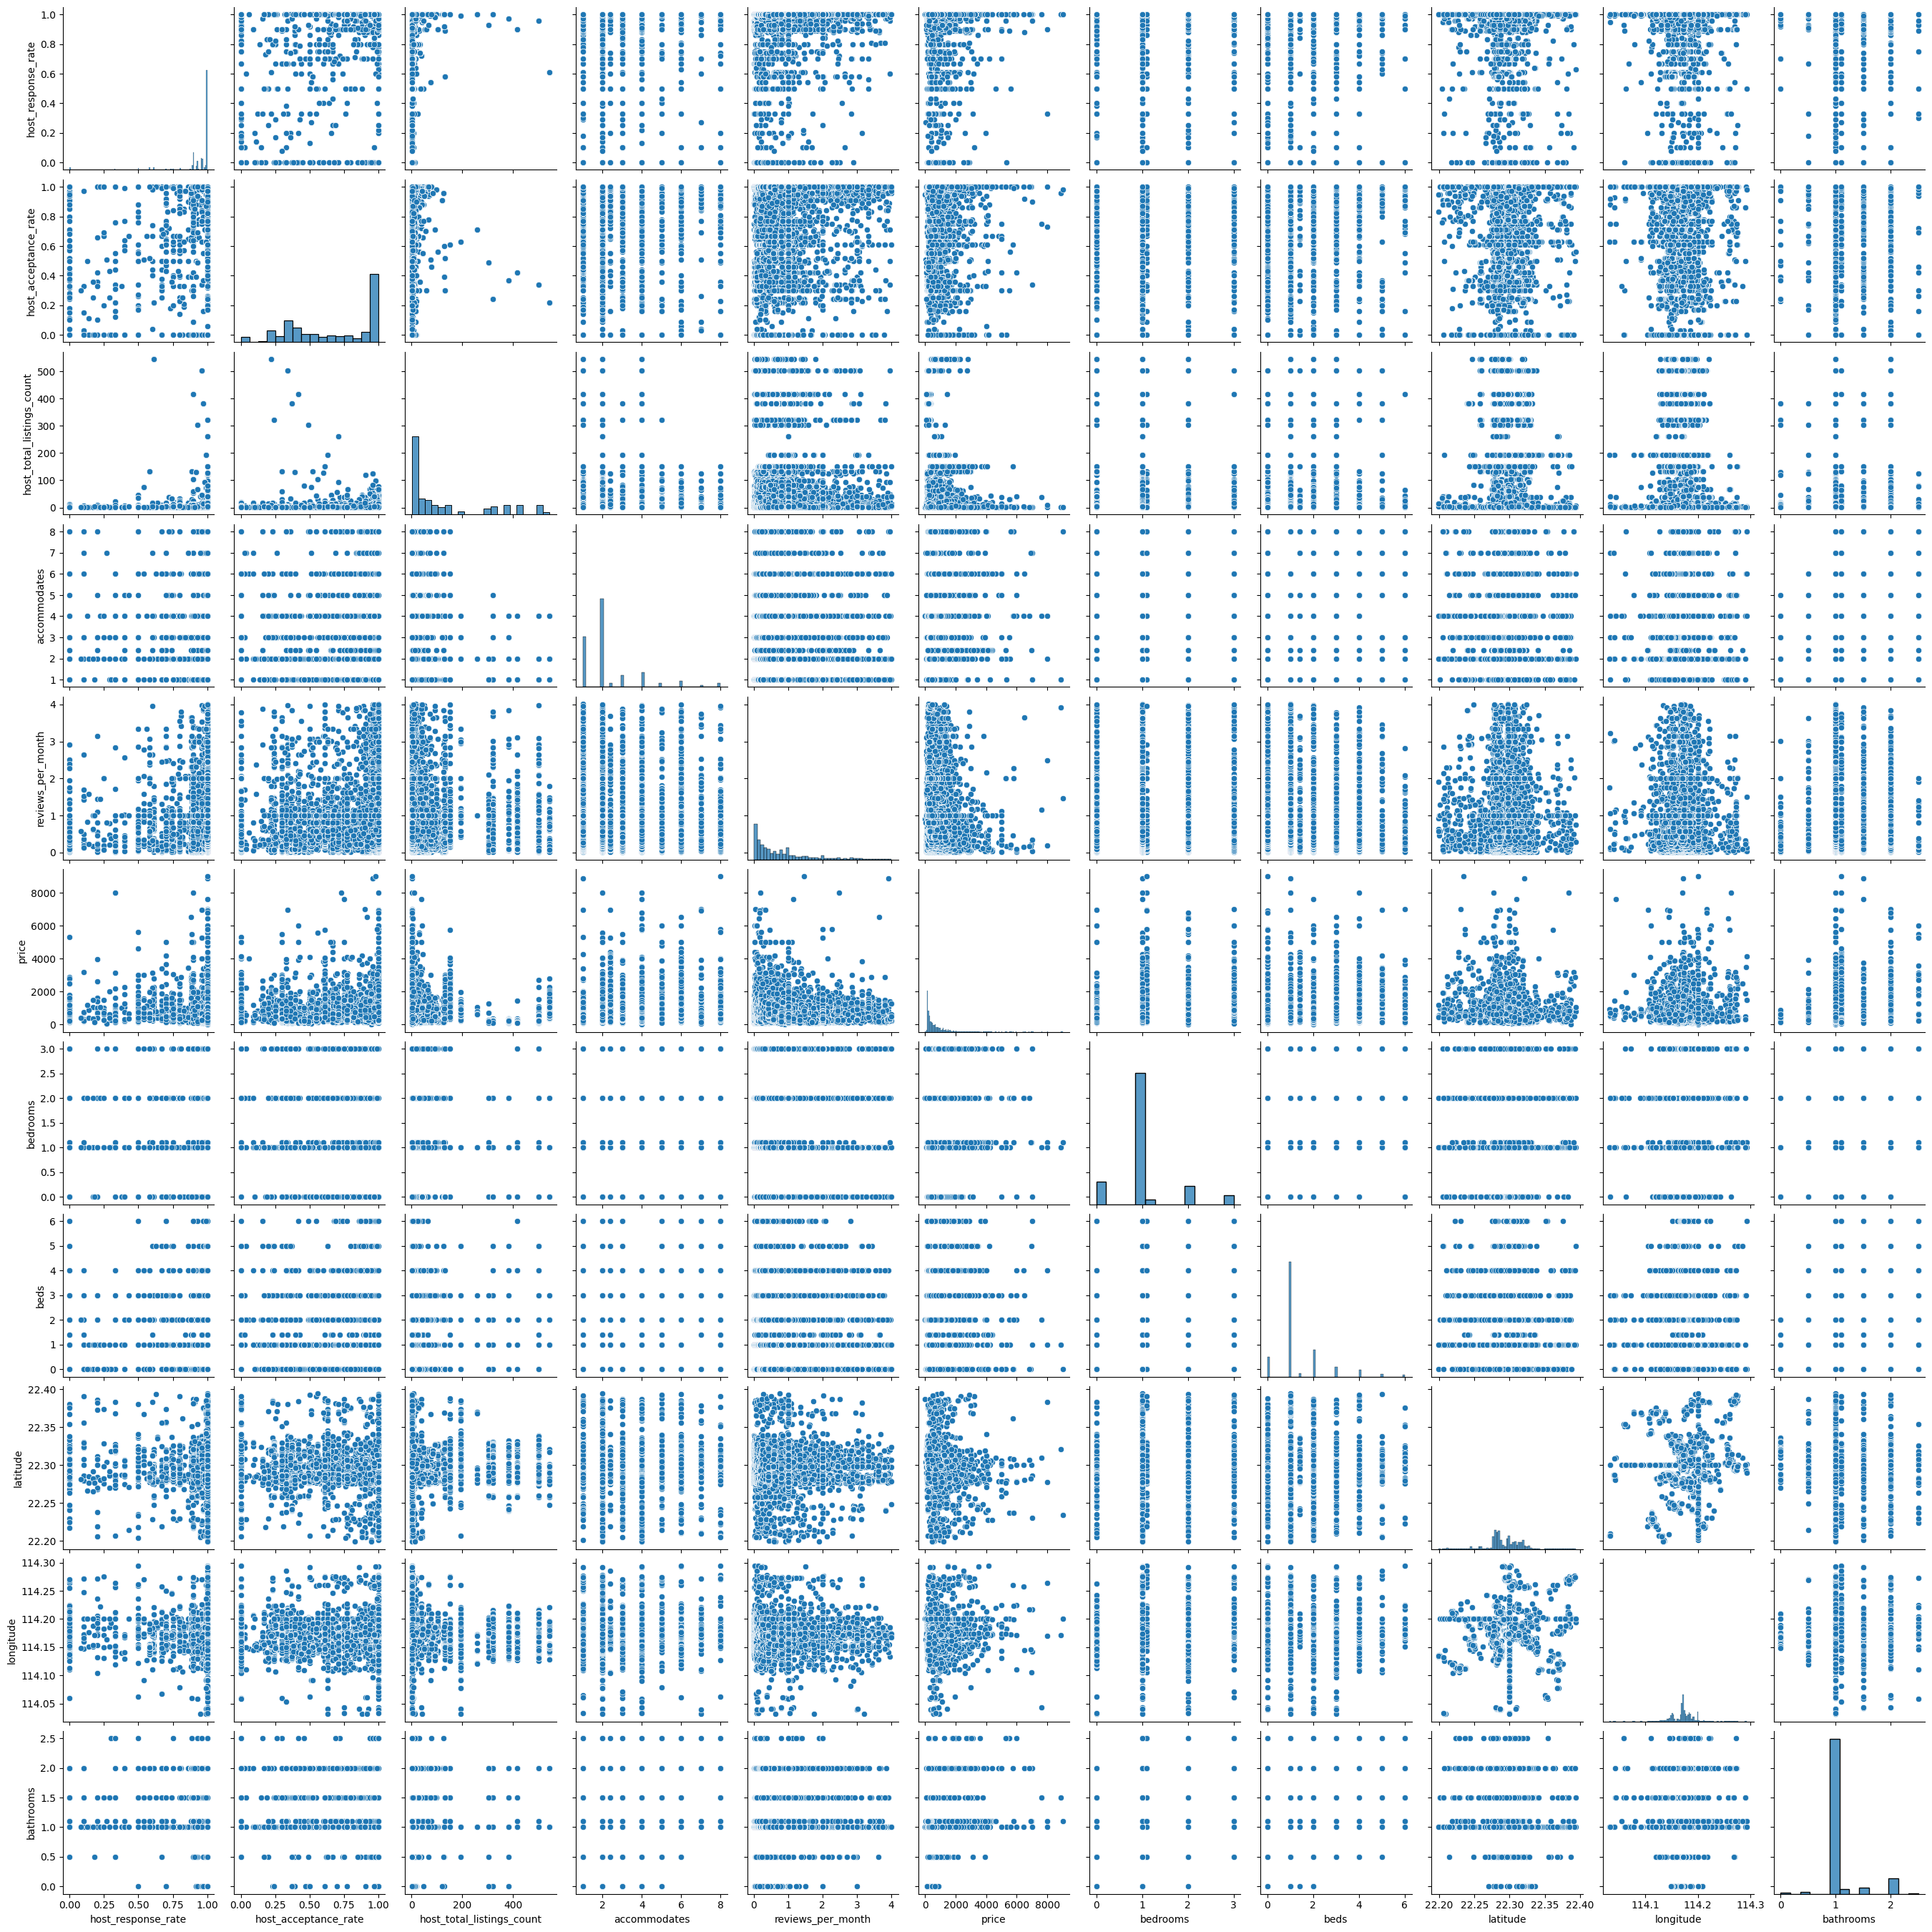

In [11]:
sns.pairplot(variablesselec_h)

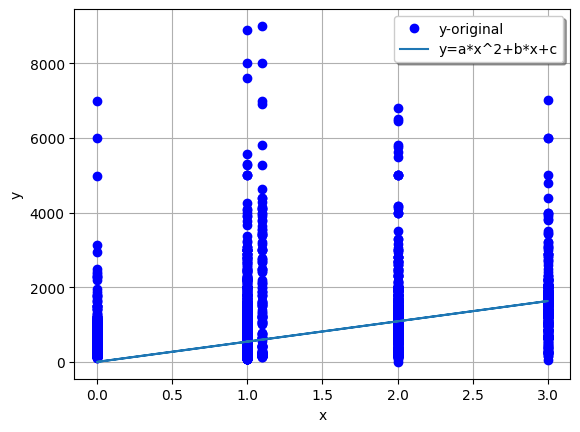

0.30295676662025944

In [13]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p1= variablesselec_h[['bedrooms']]
var_dep_p1= variablesselec_h['price']

#Redefinimos las variables 
x= vars_indep_p1
y= var_dep_p1

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['price'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)



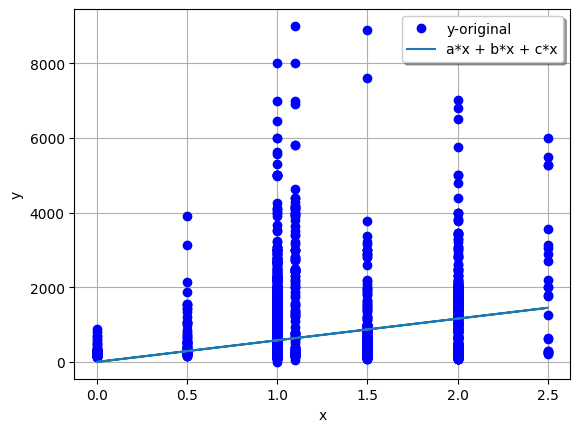

0.19148460803307596

In [47]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h[['bathrooms']]
var_dep_p2= variablesselec_h['price']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['price'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x + b*x + c*x

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

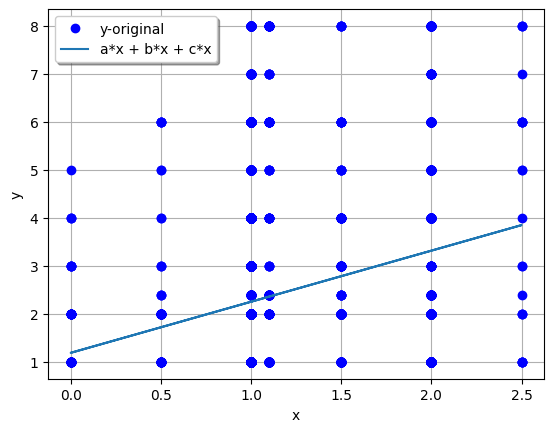

0.2197506083309929

In [55]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h[['bathrooms']]
var_dep_p2= variablesselec_h['accommodates']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['accommodates'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

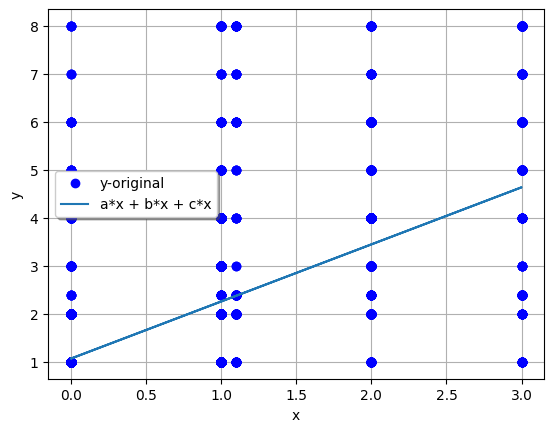

0.49452737439583594

In [56]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h[['bedrooms']]
var_dep_p2= variablesselec_h['accommodates']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['accommodates'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_11368\242523146.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['host_response_rate'])
C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_11368\242523146.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['host_response_rate'])


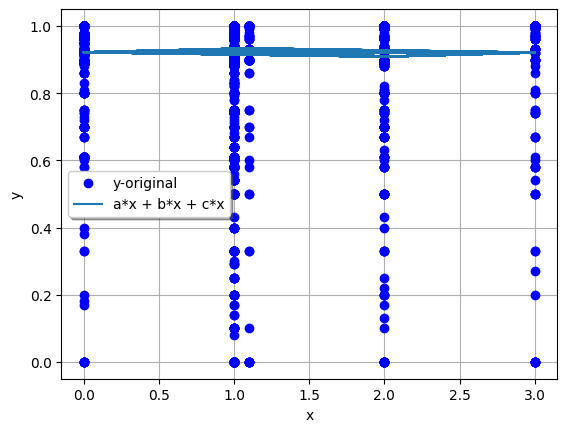

0.042288442093446635

In [68]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h[['bedrooms']]
var_dep_p2= variablesselec_h['host_response_rate']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.tan(x) + b 

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['host_response_rate'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x) + b 

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_11368\2269414115.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_response_rate'])
C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_11368\2269414115.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_response_rate'])


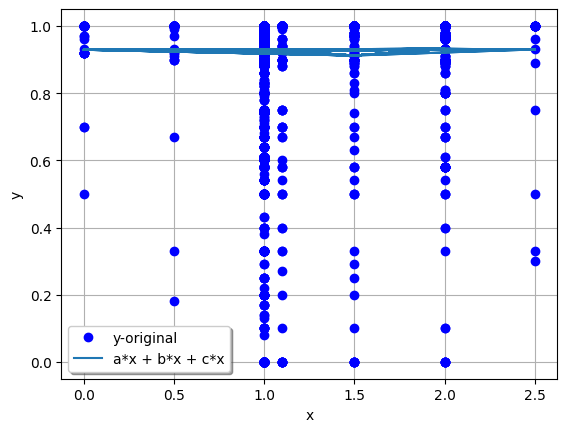

0.01849646916519527

In [77]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h['bathrooms']
var_dep_p2= variablesselec_h['host_response_rate']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_response_rate'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x) + b

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_11368\814251251.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_acceptance_rate'])
C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_11368\814251251.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_acceptance_rate'])


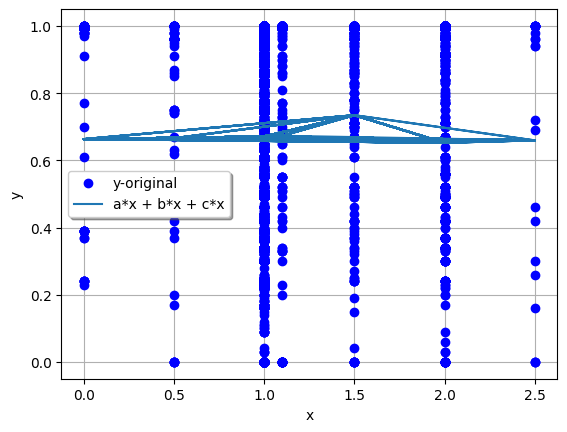

0.04242297042857276

In [123]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h['bathrooms']
var_dep_p2= variablesselec_h['host_acceptance_rate']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_acceptance_rate'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x) + b
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

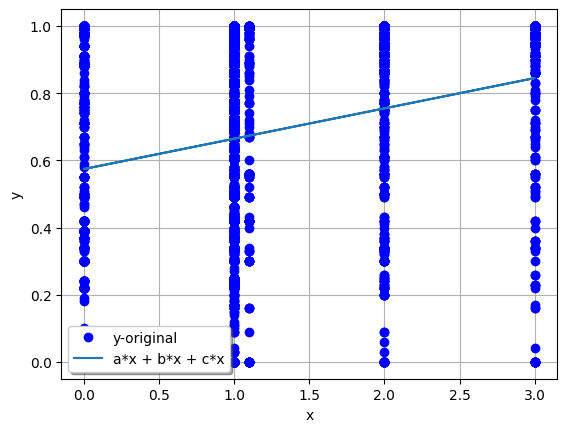

0.19039877373610667

In [91]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h['bedrooms']
var_dep_p2= variablesselec_h['host_acceptance_rate']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['host_acceptance_rate'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

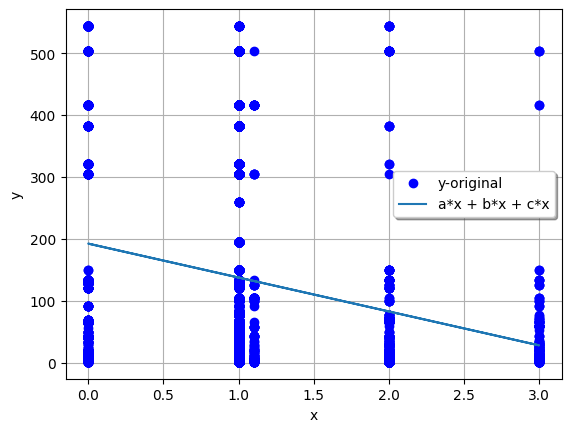

0.21118916050199493

In [101]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h['bedrooms']
var_dep_p2= variablesselec_h['host_total_listings_count']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['host_total_listings_count'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

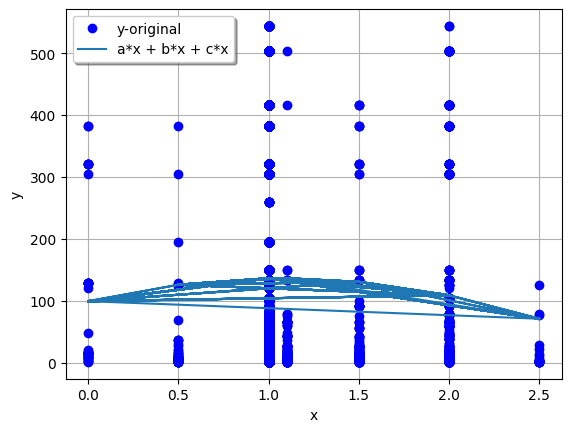

0.054038008117258764

In [121]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h['bathrooms']
var_dep_p2= variablesselec_h['host_total_listings_count']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c 

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_total_listings_count'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

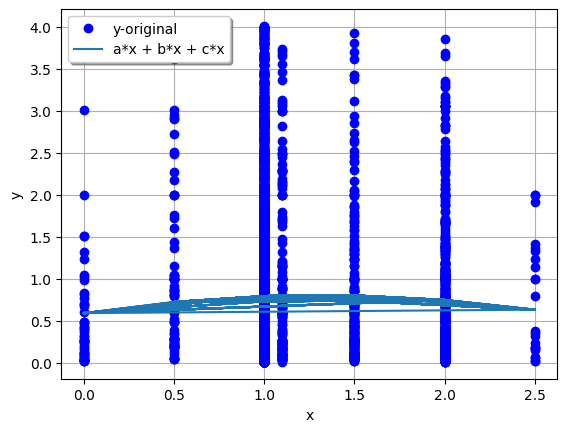

0.02940373189110512

In [118]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h['bathrooms']
var_dep_p2= variablesselec_h['reviews_per_month']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['reviews_per_month'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bathrooms'], variablesselec_h['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

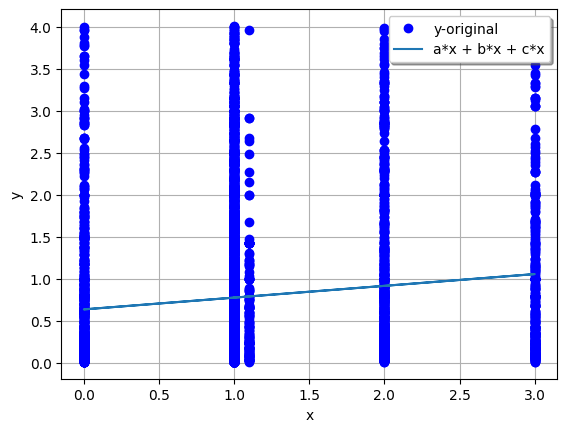

0.10689854218357704

In [109]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_h['bedrooms']
var_dep_p2= variablesselec_h['reviews_per_month']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c 

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['reviews_per_month'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_h['bedrooms'], variablesselec_h['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c 
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)